In [13]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import libst

In [18]:
def ExactSolution(svr, iter_num, dt, gfun) :
    v = np.array([])
    for e in svr.selms(odd_plane = False):
        x = (e.xctr - iter_num * dt) % svr.grid.xmax  # dealt with boundary treatment
        if x < 2 * np.pi or x > 4 * np.pi:
            v = np.append(v, 0)
        else:
            v = np.append(v, gfun(x))
    return v

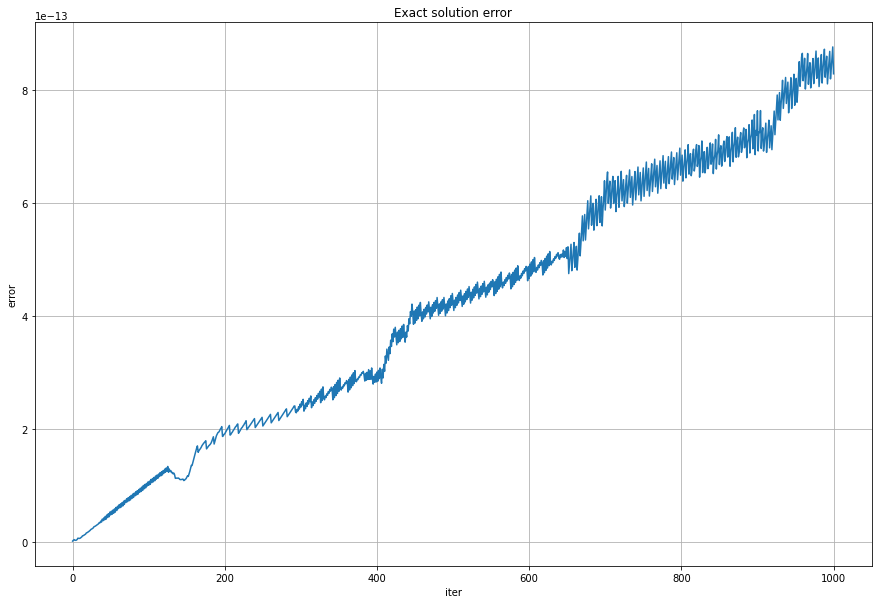

In [72]:
grid = libst.Grid(0, 4 * 2 * np.pi, 4 * 64)
cfl = 1
dx = (grid.xmax - grid.xmin) / grid.ncelm
dt = dx * cfl
svr = libst.LinearScalarSolver(grid = grid, time_increment = dt)

Num = 1000
error = np.zeros(Num + 1);
iterNum = range(Num + 1);

# Initialize
for e in svr.selms(odd_plane = False):
    if e.xctr < 2 * np.pi or e.xctr > 2 * 2 * np.pi:
        v = 0
        dv = 0
    else:
        v = np.sin(e.xctr)
        dv = np.cos(e.xctr)
    e.set_so0(0, v)
    e.set_so1(0, dv)

svr.setup_march()
    
for i in iterNum:
    svr.march_alpha2(1)
    error[i] = np.linalg.norm((svr.get_so0(0).ndarray - ExactSolution(svr, i + 1, dt, np.sin)), ord = 2)
    
plt.figure(figsize=(15,10))
plt.xlabel('iter')
plt.ylabel('error')
plt.yscale('log')
plt.title('Exact solution error')
plt.grid()
plt.plot(iterNum, error, '-')